In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [2]:
df_accepted = pd.read_csv("accepted_2007_to_2018Q4.csv")
# df_rejected = pd.read_csv("rejected.csv")

/Users/carterpace/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(df_accepted.info())
# print(df_rejected.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB
None


In [4]:
df_accepted.loan_status.value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [5]:
df = df_accepted[df_accepted['loan_status'].isin(['Fully Paid', 'Charged Off', 'Default'])]

In [ ]:
# dummy variable to include Default in Charged Off
# df['bad_loan'] = 

In [6]:
df['year'] = df['issue_d'].str.strip().str[-4:]

/Users/carterpace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [7]:
df.year.value_counts()

2015    375546
2016    293105
2014    223103
2017    169321
2013    134804
2018     56318
2012     53367
2011     21721
2010     11536
2009      4716
2008      1562
2007       251
Name: year, dtype: int64

In [8]:
df = df[df['year'].isin(['2014', '2015', '2016', '2017', '2018'])]

In [9]:
df.shape

(1117393, 152)

In [10]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_last_payment_amount', 'disbursement_method',
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term', 'year'],
      dtype='object', length=152)

In [11]:
total_num = df.isnull().sum().sort_values(ascending=False)

In [12]:
perc = df.isnull().sum()/df.isnull().count() *100
perc1 = (round(perc,2).sort_values(ascending=False))

# Creating a data frame:
df_miss = pd.concat([total_num, perc1], axis =1 , keys =["Total Missing Values", "Percentage %"]).sort_values(by ="Percentage %", ascending = False)

/Users/carterpace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """


In [13]:
top_mis = df_miss[df_miss["Percentage %"]<10]
top_mis.reset_index(inplace=True)
vals = list(top_mis['index'])

In [14]:
df = df[vals]

In [15]:
df.shape

(1117393, 94)

In [16]:
num_feat = df.select_dtypes('number').columns.values
df[num_feat].nunique().sort_values()

policy_code                         1
num_tl_30dpd                        5
num_tl_120dpd_2m                    6
inq_last_6mths                      7
acc_now_delinq                      8
chargeoff_within_12_mths           11
pub_rec_bankruptcies               12
collections_12_mths_ex_med         15
mths_since_recent_inq              26
num_tl_90g_dpd_24m                 28
delinq_2yrs                        30
num_tl_op_past_12m                 32
num_actv_bc_tl                     34
tax_liens                          34
pub_rec                            36
fico_range_low                     38
fico_range_high                    38
num_accts_ever_120_pd              39
mort_acc                           39
out_prncp_inv                      41
out_prncp                          41
num_rev_tl_bal_gt_0                46
num_actv_rev_tl                    52
num_bc_sats                        52
acc_open_past_24mths               55
num_bc_tl                          67
last_fico_ra

In [17]:
import numpy as np
from itertools import combinations
from scipy.stats import pearsonr

num_feat = df.select_dtypes('number').columns.values
comb_num_feat = np.array(list(combinations(num_feat, 2)))
corr_num_feat = np.array([])
for comb in comb_num_feat:
    corr = pearsonr(df[comb[0]], df[comb[1]])[0]
    corr_num_feat = np.append(corr_num_feat, corr)

/Users/carterpace/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


In [18]:
corr_num_feat

array([       nan,        nan,        nan, ..., 0.51269767, 0.04609503,
       0.25066582])

In [19]:
high_corr_num = comb_num_feat[np.abs(corr_num_feat) >= 0.8]
high_corr_num

/Users/carterpace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater_equal
  """Entry point for launching an IPython kernel.


array([['revol_bal', 'total_rev_hi_lim'],
       ['recoveries', 'collection_recovery_fee'],
       ['total_pymnt_inv', 'total_rec_prncp'],
       ['total_pymnt_inv', 'total_pymnt'],
       ['total_pymnt_inv', 'installment'],
       ['total_pymnt_inv', 'funded_amnt_inv'],
       ['total_pymnt_inv', 'funded_amnt'],
       ['total_pymnt_inv', 'loan_amnt'],
       ['total_rec_prncp', 'total_pymnt'],
       ['total_pymnt', 'installment'],
       ['total_pymnt', 'funded_amnt_inv'],
       ['total_pymnt', 'funded_amnt'],
       ['total_pymnt', 'loan_amnt'],
       ['total_il_high_credit_limit', 'total_bal_ex_mort'],
       ['tot_hi_cred_lim', 'tot_cur_bal'],
       ['num_actv_bc_tl', 'num_bc_sats'],
       ['num_actv_bc_tl', 'num_rev_tl_bal_gt_0'],
       ['num_actv_bc_tl', 'num_actv_rev_tl'],
       ['out_prncp_inv', 'out_prncp'],
       ['installment', 'funded_amnt_inv'],
       ['installment', 'funded_amnt'],
       ['installment', 'loan_amnt'],
       ['funded_amnt_inv', 'funded_amnt'],
 

In [20]:
df3 = df.drop(np.unique(high_corr_num[:, 0]), axis=1, errors='ignore')
df3.shape

(1117393, 77)

In [21]:
df3.head()

,mths_since_recent_inq,emp_title,emp_length,num_tl_120dpd_2m,mo_sin_old_il_acct,title,bc_util,percent_bc_gt_75,bc_open_to_buy,mths_since_recent_bc,...,num_accts_ever_120_pd,mort_acc,mo_sin_rcnt_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,loan_status,loan_amnt,last_pymnt_amnt,last_fico_range_low,zip_code
0,4.0,leadman,10+ years,0.0,148.0,Debt consolidation,37.2,0.0,1506.0,4.0,...,2.0,1.0,3.0,3.0,128.0,Fully Paid,3600.0,122.67,560.0,190xx
1,0.0,Engineer,10+ years,0.0,113.0,Business,27.1,7.7,57830.0,2.0,...,0.0,4.0,2.0,2.0,192.0,Fully Paid,24700.0,926.35,695.0,577xx
2,10.0,truck driver,10+ years,0.0,125.0,NaN,55.9,50.0,2737.0,101.0,...,0.0,5.0,14.0,14.0,184.0,Fully Paid,20000.0,15813.30,700.0,605xx
4,1.0,Contract Specialist,3 years,0.0,128.0,Major purchase,77.5,60.0,4567.0,4.0,...,0.0,6.0,4.0,4.0,210.0,Fully Paid,10400.0,10128.96,700.0,174xx
5,NaN,Veterinary Tecnician,4 years,0.0,338.0,Debt consolidation,91.0,100.0,844.0,36.0,...,0.0,0.0,32.0,32.0,54.0,Fully Paid,11950.0,7653.56,755.0,300xx


In [22]:
# df3.info()
df3['loan_status'].value_counts()

Fully Paid     884132
Charged Off    233221
Default            40
Name: loan_status, dtype: int64

In [23]:
# df3.drop(['emp_title', ])
df4 = df3.select_dtypes(include='object')

In [24]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1117393 entries, 0 to 2260697
Data columns (total 25 columns):
emp_title               1045806 non-null object
emp_length              1047842 non-null object
title                   1100752 non-null object
last_pymnt_d            1115301 non-null object
pymnt_plan              1117393 non-null object
purpose                 1117393 non-null object
sub_grade               1117393 non-null object
year                    1117393 non-null object
verification_status     1117393 non-null object
url                     1117393 non-null object
term                    1117393 non-null object
initial_list_status     1117393 non-null object
id                      1117393 non-null object
home_ownership          1117393 non-null object
hardship_flag           1117393 non-null object
grade                   1117393 non-null object
earliest_cr_line        1117393 non-null object
disbursement_method     1117393 non-null object
debt_settlement_flag   

In [25]:
# MAYBE FEATURE ENGINEER REGION FROM "ADDR_STATE"
# - create interest rate factor type variable

In [26]:
drop_col = ['emp_title', 
            'title', 
            'last_pymnt_d', 
            'pymnt_plan', 
            'url', 
            'id', 
            'hardship_flag', 
            'grade', 
            'earliest_cr_line', 
            'year', 
            'last_credit_pull_d', 
            'zip_code',
            
            ##numeral variables
            'last_fico_range_low',
            'last_pymnt_amnt',
            ]

In [27]:
df3 = df3.drop(drop_col, axis=1)

In [28]:
df3.shape

(1117393, 63)

In [29]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1117393 entries, 0 to 2260697
Data columns (total 63 columns):
mths_since_recent_inq         1010973 non-null float64
emp_length                    1047842 non-null object
num_tl_120dpd_2m              1067773 non-null float64
mo_sin_old_il_acct            1085475 non-null float64
bc_util                       1104377 non-null float64
percent_bc_gt_75              1104650 non-null float64
bc_open_to_buy                1105059 non-null float64
mths_since_recent_bc          1105784 non-null float64
revol_util                    1116711 non-null float64
dti                           1117019 non-null float64
policy_code                   1117393 non-null float64
pub_rec                       1117393 non-null float64
pub_rec_bankruptcies          1117393 non-null float64
purpose                       1117393 non-null object
acc_now_delinq                1117393 non-null float64
sub_grade                     1117393 non-null object
tax_liens 

In [30]:
# df4['num_tl_120dpd_2m'].value_counts()

In [31]:
df4 = df3.select_dtypes(include='object')
categorical_features = list(df4.columns)

In [32]:
#categories
for col in categorical_features:
        df3[col] = df3[col].astype('category')

In [33]:
df3['policy_code'] = df3['policy_code'].astype('category')

In [34]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1117393 entries, 0 to 2260697
Data columns (total 63 columns):
mths_since_recent_inq         1010973 non-null float64
emp_length                    1047842 non-null category
num_tl_120dpd_2m              1067773 non-null float64
mo_sin_old_il_acct            1085475 non-null float64
bc_util                       1104377 non-null float64
percent_bc_gt_75              1104650 non-null float64
bc_open_to_buy                1105059 non-null float64
mths_since_recent_bc          1105784 non-null float64
revol_util                    1116711 non-null float64
dti                           1117019 non-null float64
policy_code                   1117393 non-null category
pub_rec                       1117393 non-null float64
pub_rec_bankruptcies          1117393 non-null float64
purpose                       1117393 non-null category
acc_now_delinq                1117393 non-null float64
sub_grade                     1117393 non-null category
tax

In [35]:
libor = pd.read_csv('libor.csv')
libor.head()

,month,libor
0,Jan-2020,1.66
1,Dec-2019,1.76
2,Nov-2019,1.69
3,Oct-2019,1.79
4,Sep-2019,2.02


In [36]:
df3['issue_d'] = df3['issue_d'].astype('object')
df123 = pd.merge(df3, libor, left_on='issue_d', right_on='month')
df123.head()

,mths_since_recent_inq,emp_length,num_tl_120dpd_2m,mo_sin_old_il_acct,bc_util,percent_bc_gt_75,bc_open_to_buy,mths_since_recent_bc,revol_util,dti,...,acc_open_past_24mths,num_accts_ever_120_pd,mort_acc,mo_sin_rcnt_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,loan_status,loan_amnt,month,libor
0,4.0,10+ years,0.0,148.0,37.2,0.0,1506.0,4.0,29.7,5.91,...,4.0,2.0,1.0,3.0,3.0,128.0,Fully Paid,3600.0,Dec-2015,0.42
1,0.0,10+ years,0.0,113.0,27.1,7.7,57830.0,2.0,19.2,16.06,...,4.0,0.0,4.0,2.0,2.0,192.0,Fully Paid,24700.0,Dec-2015,0.42
2,10.0,10+ years,0.0,125.0,55.9,50.0,2737.0,101.0,56.2,10.78,...,6.0,0.0,5.0,14.0,14.0,184.0,Fully Paid,20000.0,Dec-2015,0.42
3,1.0,3 years,0.0,128.0,77.5,60.0,4567.0,4.0,64.5,25.37,...,10.0,0.0,6.0,4.0,4.0,210.0,Fully Paid,10400.0,Dec-2015,0.42
4,NaN,4 years,0.0,338.0,91.0,100.0,844.0,36.0,68.4,10.20,...,0.0,0.0,0.0,32.0,32.0,54.0,Fully Paid,11950.0,Dec-2015,0.42


In [37]:
df123 = df123.drop('month', axis=1)
df123.shape

(1117393, 64)

In [38]:
numeric_features = df123.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df123.select_dtypes(include=['object', 'category']).columns
categorical_features=categorical_features.drop(['loan_status'])

# print(numeric_features)

In [39]:
# # imputing

# #6 You need to import an imputer, for instance the Imputer from sklearn
# from sklearn.impute import SimpleImputer

# #6a Now you need to impute missing numerical values. What imputation strategy will you choose?
# imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
# imputer = imputer.fit(df123[numeric_features.tolist()])
# df123[numeric_features.tolist()] = imputer.transform(df123[numeric_features.tolist()])

# #new
# imputercat = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
# df123[categorical_features] = imputercat.fit_transform(df123[categorical_features.tolist()])

# #6d Check if you resolved all missing values
# print(df123.isnull().sum())


In [40]:
# df123['int_rate_over_libor'] = df123['int_rate']/(df123['libor'])
# df123[['issue_d', 'int_rate', 'libor', 'int_rate_over_libor']]

In [41]:
#dropped these two because too many unique values. Maybe we can feature engineer them down.
df123 = df123.drop(['issue_d','addr_state'], axis=1)
data=df123.copy().sample(n=50000, random_state=1)
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data.select_dtypes(include=['object', 'category']).columns
categorical_features=categorical_features.drop(['loan_status'])
X = data.loc[:, data.columns != 'loan_status']
# Create a new dataframe y that includes only our 
y = data.loan_status

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


#1 Inner Pipeline1: Create a numeric transformer with 2 steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy = 'median'))])

#2 Inner Pipeline2: Create a categorical transformer with 2 steps
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))])

#3 Create Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

0.9286
              precision    recall  f1-score   support

 Charged Off       1.00      0.66      0.79      3104
  Fully Paid       0.92      1.00      0.96     11896

    accuracy                           0.93     15000
   macro avg       0.96      0.83      0.87     15000
weighted avg       0.93      0.93      0.92     15000



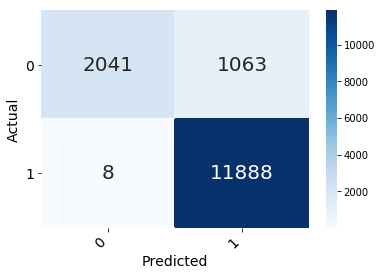

In [44]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.feature_selection import SelectFromModel, SelectKBest
from matplotlib import pyplot as plt
MainPipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(n_estimators=90) )])
#('fs',SelectFromModel(ExtraTreesClassifier())),
# split sample into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y,random_state=42)  # random_state=21 # stratify=y


# Fit Model
MainPipe.fit(X_train,y_train)

# Predict model
y_pred = MainPipe.predict(X_test)

# Output the accuracy of our prediction
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

# Visualize the confusion matrix to make it easier to read
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_df = pd.DataFrame(con_matrix, ('0', '1'), ('0', '1'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d", cmap="Blues")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)
plt.xlabel('Predicted', fontsize = 14)

# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [45]:
mult_value=[]
for col in pd.get_dummies(X_train,drop_first=True):
    mult_value.append(len(pd.get_dummies(X_train,drop_first=True)[col].unique())!=1)

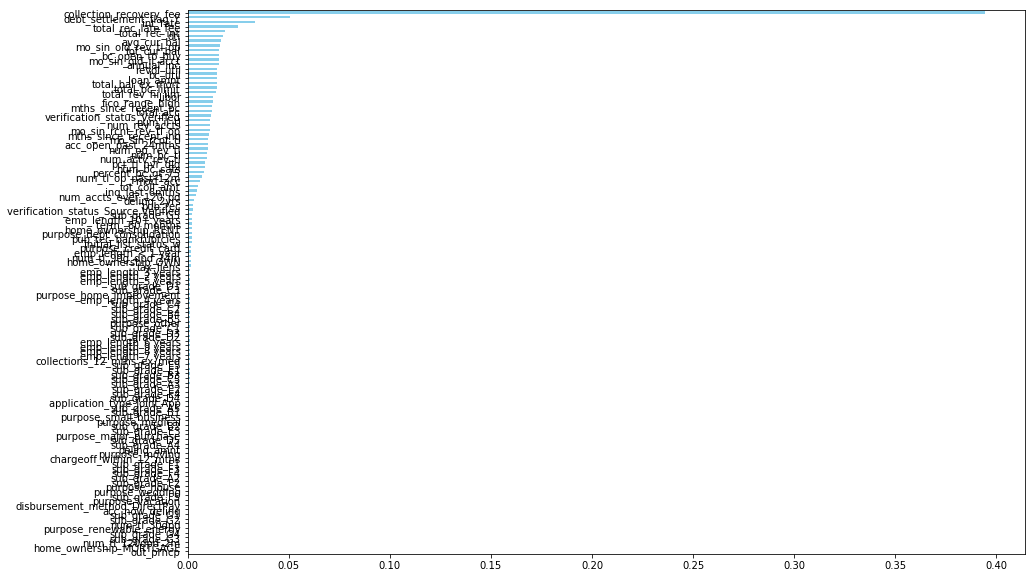

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a pd.Series of features importances
importances_rf = pd.Series(MainPipe.named_steps['classifier'].feature_importances_, 
                           index = pd.get_dummies(X,drop_first=True).drop(['home_ownership_NONE','purpose_educational'],axis=1).columns)

# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()

# Make a horizontal bar plot
plt.figure(figsize=(15,10))
sorted_importances_rf.plot(kind='barh', color='skyblue'); 
plt.show()

In [53]:
sorted_importances_rf[-30:].index.tolist()

['num_op_rev_tl',
 'acc_open_past_24mths',
 'mo_sin_rcnt_tl',
 'mths_since_recent_inq',
 'mo_sin_rcnt_rev_tl_op',
 'num_rev_accts',
 'num_il_tl',
 'verification_status_Verified',
 'total_acc',
 'mths_since_recent_bc',
 'fico_range_high',
 'libor',
 'total_rev_hi_lim',
 'total_bc_limit',
 'total_bal_ex_mort',
 'loan_amnt',
 'bc_util',
 'revol_util',
 'annual_inc',
 'mo_sin_old_il_acct',
 'bc_open_to_buy',
 'tot_cur_bal',
 'mo_sin_old_rev_tl_op',
 'avg_cur_bal',
 'dti',
 'total_rec_int',
 'total_rec_late_fee',
 'int_rate',
 'debt_settlement_flag_Y',
 'collection_recovery_fee']

In [73]:
drop_vars = [
 'num_op_rev_tl',
 'acc_open_past_24mths',
 'mo_sin_rcnt_tl',
 'mths_since_recent_inq',
#  'mo_sin_rcnt_rev_tl_op',
 'num_rev_accts',    #maybe
 'num_il_tl',        #maybe
#  'verification_status_Verified',
#  'total_acc',
 'mths_since_recent_bc',
#  'fico_range_high',
#  'libor',
 'total_rev_hi_lim', #maybe
 'total_bc_limit',   #maybe
#     
 'total_bal_ex_mort',
#  'loan_amnt',
 'bc_util',
#  'revol_util',
#  'annual_inc',
 'mo_sin_old_il_acct',
#  'bc_open_to_buy', 
#  'tot_cur_bal',
 'mo_sin_old_rev_tl_op',
 'avg_cur_bal',
#  'dti',
 'total_rec_int',
 'total_rec_late_fee'
#  'int_rate'
 'debt_settlement_flag',
 'collection_recovery_fee'
]

Use the above to drop features (i have shown some examples below) that are not helpful in prediction. These are features that we would not know prior to investing in a loan. 

Then we can recreate the model and train and test on that.

In [74]:
df123 = df123.drop(drop_vars, axis=1)
data=df123.copy().sample(n=50000, random_state=1)
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data.select_dtypes(include=['object', 'category']).columns
categorical_features=categorical_features.drop(['loan_status'])
X = data.loc[:, data.columns != 'loan_status']
# Create a new dataframe y that includes only our 
y = data.loan_status

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
#from sklearn.impute import Imputer
from sklearn.compose import ColumnTransformer


#1 Inner Pipeline1: Create a numeric transformer with 2 steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy = 'median'))])

#2 Inner Pipeline2: Create a categorical transformer with 2 steps
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))])

#3 Create Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

0.7942
              precision    recall  f1-score   support

 Charged Off       0.52      0.06      0.11      3104
  Fully Paid       0.80      0.99      0.88     11896

    accuracy                           0.79     15000
   macro avg       0.66      0.52      0.50     15000
weighted avg       0.74      0.79      0.72     15000



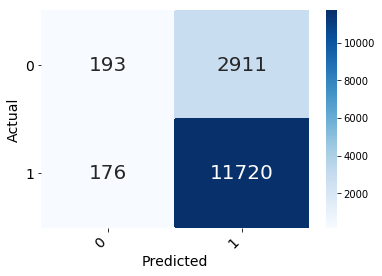

In [76]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.feature_selection import SelectFromModel, SelectKBest
from matplotlib import pyplot as plt
MainPipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(n_estimators=90) )])
#('fs',SelectFromModel(ExtraTreesClassifier())),
# split sample into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y,random_state=42)  # random_state=21 # stratify=y


# Fit Model
MainPipe.fit(X_train,y_train)

# Predict model
y_pred = MainPipe.predict(X_test)

# Output the accuracy of our prediction
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

# Visualize the confusion matrix to make it easier to read
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_df = pd.DataFrame(con_matrix, ('0', '1'), ('0', '1'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d", cmap="Blues")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)
plt.xlabel('Predicted', fontsize = 14)

# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

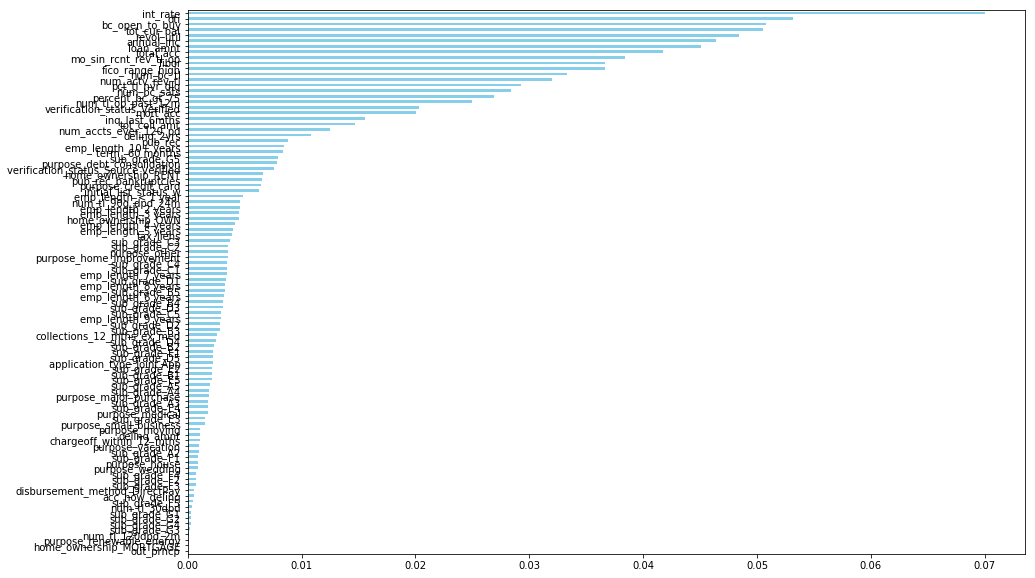

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a pd.Series of features importances
importances_rf = pd.Series(MainPipe.named_steps['classifier'].feature_importances_, index = pd.get_dummies(X,drop_first=True).drop(['home_ownership_NONE','purpose_educational'],axis=1).columns)

# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()

# Make a horizontal bar plot
plt.figure(figsize=(15,10))
sorted_importances_rf.plot(kind='barh', color='skyblue'); 
plt.show()

In [85]:
sorted_importances_rf.index.tolist()

['out_prncp',
 'home_ownership_MORTGAGE',
 'purpose_renewable_energy',
 'num_tl_120dpd_2m',
 'sub_grade_G3',
 'sub_grade_G4',
 'sub_grade_G2',
 'sub_grade_G1',
 'num_tl_30dpd',
 'sub_grade_F5',
 'acc_now_delinq',
 'disbursement_method_DirectPay',
 'sub_grade_F3',
 'sub_grade_F2',
 'sub_grade_F4',
 'purpose_wedding',
 'purpose_house',
 'sub_grade_F1',
 'sub_grade_A2',
 'purpose_vacation',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'purpose_moving',
 'purpose_small_business',
 'sub_grade_E3',
 'purpose_medical',
 'sub_grade_E4',
 'sub_grade_A3',
 'purpose_major_purchase',
 'sub_grade_A4',
 'sub_grade_A5',
 'sub_grade_E5',
 'sub_grade_B1',
 'sub_grade_E2',
 'application_type_Joint App',
 'sub_grade_D5',
 'sub_grade_E1',
 'sub_grade_B2',
 'sub_grade_D4',
 'collections_12_mths_ex_med',
 'sub_grade_B3',
 'sub_grade_D2',
 'emp_length_9 years',
 'sub_grade_C5',
 'sub_grade_D3',
 'sub_grade_B4',
 'emp_length_6 years',
 'sub_grade_B5',
 'emp_length_8 years',
 'sub_grade_D1',
 'emp_length_7 ye

In [66]:
df123.shape

(1117393, 46)

In [80]:
final_drop_vars = [
 'out_prncp', #dropping because 0 feature imporatnce
#  'home_ownership_MORTGAGE',
#  'purpose_renewable_energy',
 'num_tl_120dpd_2m',
#  'sub_grade_G3',
#  'sub_grade_G4',
#  'sub_grade_G2',
#  'sub_grade_G1',
 'num_tl_30dpd',
#  'sub_grade_F5',
#  'acc_now_delinq',
#  'disbursement_method_DirectPay',
#  'sub_grade_F3',
#  'sub_grade_F2',
#  'sub_grade_F4',
#  'purpose_wedding',
#  'purpose_house',
#  'sub_grade_F1',
#  'sub_grade_A2',
#  'purpose_vacation',
 'chargeoff_within_12_mths',         #dont think we have this but double check
#  'delinq_amnt',
#  'purpose_moving',
#  'purpose_small_business',
#  'sub_grade_E3',
#  'purpose_medical',
#  'sub_grade_E4',
#  'sub_grade_A3',
#  'purpose_major_purchase',
#  'sub_grade_A4',
#  'sub_grade_A5',
#  'sub_grade_E5',
#  'sub_grade_B1',
#  'sub_grade_E2',
#  'application_type_Joint App',
#  'sub_grade_D5',
#  'sub_grade_E1',
#  'sub_grade_B2',
#  'sub_grade_D4',
#  'collections_12_mths_ex_med',     #collections excluding medical
#  'sub_grade_B3',
#  'sub_grade_D2',
#  'emp_length_9 years',
#  'sub_grade_C5',
#  'sub_grade_D3',
#  'sub_grade_B4',
#  'emp_length_6 years',
#  'sub_grade_B5',
#  'emp_length_8 years',
#  'sub_grade_D1',
#  'emp_length_7 years',
#  'sub_grade_C1',
#  'sub_grade_C4',
#  'purpose_home_improvement',
#  'purpose_other',
#  'sub_grade_C2',
#  'sub_grade_C3',
 'tax_liens',                 #don think we have this, but check
#  'emp_length_5 years',
#  'emp_length_4 years',
#  'home_ownership_OWN',
#  'emp_length_3 years',
#  'emp_length_2 years',
#  'num_tl_90g_dpd_24m',
#  'emp_length_< 1 year',
#  'initial_list_status_w',
#  'purpose_credit_card',
#  'pub_rec_bankruptcies',    #can we click on 'num public records' and see this?
#  'home_ownership_RENT',
#  'verification_status_Source Verified',
#  'purpose_debt_consolidation',
#  'sub_grade_G5',
#  'term_ 60 months',
#  'emp_length_10+ years',
#  'pub_rec',
#  'delinq_2yrs',
 'num_accts_ever_120_pd',
 'tot_coll_amt',               #we only have "total collections excluding medical" (listed above)
#  'inq_last_6mths',
#  'mort_acc',
 'num_tl_op_past_12m',
#  'percent_bc_gt_75',
 'num_bc_sats',                #maybe keep?
#  'pct_tl_nvr_dlq',
 'num_actv_rev_tl',
 'num_bc_tl',
    
    #already checked above
#  'verification_status_Verified',
#  'fico_range_high',
#  'libor',
#  'mo_sin_rcnt_rev_tl_op',
#  'total_acc',
#  'loan_amnt',
#  'annual_inc',
#  'revol_util',
#  'tot_cur_bal',
#  'bc_open_to_buy',
#  'dti',
#  'int_rate'
]

In [88]:
#final removal

df123 = df123.drop(final_drop_vars, axis=1)
data=df123.copy().sample(n=50000, random_state=1)
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data.select_dtypes(include=['object', 'category']).columns
categorical_features=categorical_features.drop(['loan_status'])
X = data.loc[:, data.columns != 'loan_status']
# Create a new dataframe y that includes only our 
y = data.loan_status

In [89]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
#from sklearn.impute import Imputer
from sklearn.compose import ColumnTransformer


#1 Inner Pipeline1: Create a numeric transformer with 2 steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy = 'median'))])

#2 Inner Pipeline2: Create a categorical transformer with 2 steps
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))])

#3 Create Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

0.7958666666666666
              precision    recall  f1-score   support

 Charged Off       0.55      0.07      0.13      3104
  Fully Paid       0.80      0.98      0.88     11896

    accuracy                           0.80     15000
   macro avg       0.68      0.53      0.51     15000
weighted avg       0.75      0.80      0.73     15000



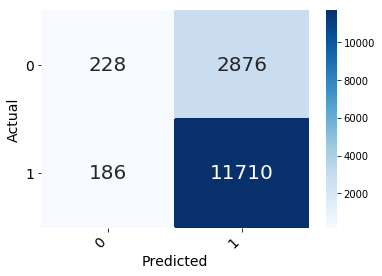

In [90]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.feature_selection import SelectFromModel, SelectKBest
from matplotlib import pyplot as plt
MainPipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(n_estimators=90) )])
#('fs',SelectFromModel(ExtraTreesClassifier())),
# split sample into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y,random_state=42)  # random_state=21 # stratify=y


# Fit Model
MainPipe.fit(X_train,y_train)

# Predict model
y_pred = MainPipe.predict(X_test)

# Output the accuracy of our prediction
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

# Visualize the confusion matrix to make it easier to read
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_df = pd.DataFrame(con_matrix, ('0', '1'), ('0', '1'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d", cmap="Blues")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)
plt.xlabel('Predicted', fontsize = 14)

# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

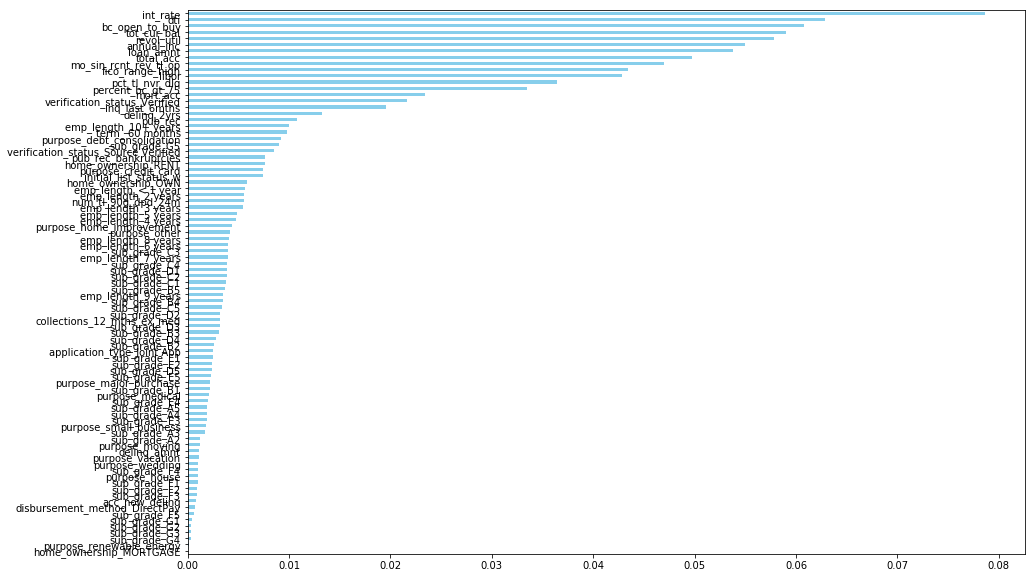

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a pd.Series of features importances
importances_rf = pd.Series(MainPipe.named_steps['classifier'].feature_importances_, index = pd.get_dummies(X,drop_first=True).drop(['home_ownership_NONE','purpose_educational'],axis=1).columns)

# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()

# Make a horizontal bar plot
plt.figure(figsize=(25,20))
sorted_importances_rf.plot(kind='barh', color='skyblue'); 
plt.show()

In [92]:
sorted_importances_rf

home_ownership_MORTGAGE                0.000000
purpose_renewable_energy               0.000148
sub_grade_G4                           0.000281
sub_grade_G3                           0.000315
sub_grade_G2                           0.000318
sub_grade_G1                           0.000458
sub_grade_F5                           0.000592
disbursement_method_DirectPay          0.000681
acc_now_delinq                         0.000782
sub_grade_F3                           0.000892
sub_grade_F2                           0.000914
sub_grade_F1                           0.000989
purpose_house                          0.001003
sub_grade_F4                           0.001022
purpose_wedding                        0.001033
purpose_vacation                       0.001096
delinq_amnt                            0.001147
purpose_moving                         0.001209
sub_grade_A2                           0.001220
sub_grade_A3                           0.001714
purpose_small_business                 0

# Sub Grade Chart

In [96]:
df_sub_grade = df123[['sub_grade', 'loan_status']]
data=df_sub_grade.copy().sample(n=50000, random_state=1)
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data.select_dtypes(include=['object', 'category']).columns
categorical_features=categorical_features.drop(['loan_status'])
X = data.loc[:, data.columns != 'loan_status']
# Create a new dataframe y that includes only our 
y = data.loan_status

In [97]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
#from sklearn.impute import Imputer
from sklearn.compose import ColumnTransformer


#1 Inner Pipeline1: Create a numeric transformer with 2 steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy = 'median'))])

#2 Inner Pipeline2: Create a categorical transformer with 2 steps
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))])

#3 Create Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

0.7918
              precision    recall  f1-score   support

 Charged Off       0.46      0.03      0.06      3104
  Fully Paid       0.80      0.99      0.88     11896

    accuracy                           0.79     15000
   macro avg       0.63      0.51      0.47     15000
weighted avg       0.73      0.79      0.71     15000



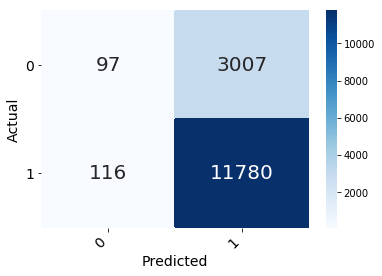

In [98]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.feature_selection import SelectFromModel, SelectKBest
from matplotlib import pyplot as plt
MainPipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(n_estimators=90) )])
#('fs',SelectFromModel(ExtraTreesClassifier())),
# split sample into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y,random_state=42)  # random_state=21 # stratify=y


# Fit Model
MainPipe.fit(X_train,y_train)

# Predict model
y_pred = MainPipe.predict(X_test)

# Output the accuracy of our prediction
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

# Visualize the confusion matrix to make it easier to read
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_df = pd.DataFrame(con_matrix, ('0', '1'), ('0', '1'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d", cmap="Blues")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)
plt.xlabel('Predicted', fontsize = 14)

# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

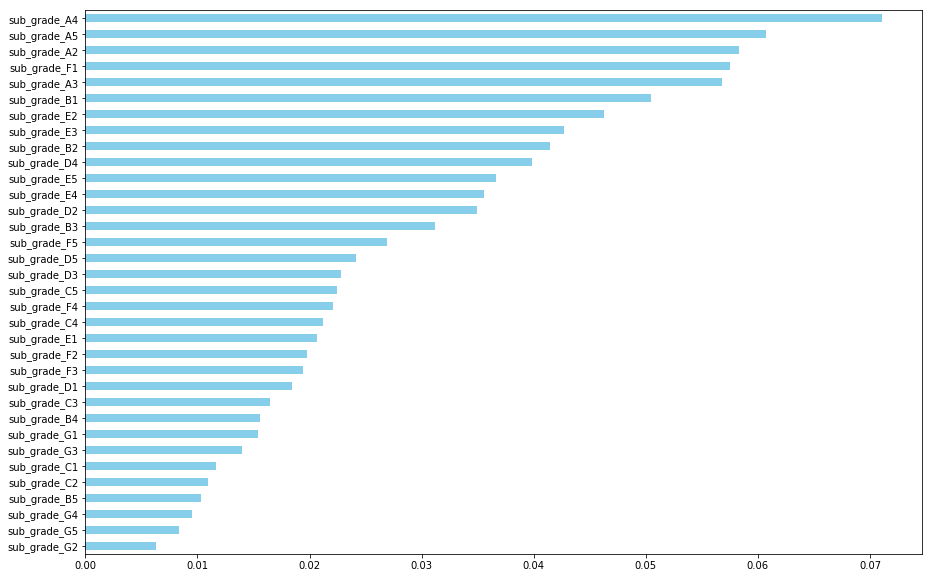

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a pd.Series of features importances
importances_rf = pd.Series(MainPipe.named_steps['classifier'].feature_importances_, index = pd.get_dummies(X,drop_first=True).columns)

# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()

# Make a horizontal bar plot
plt.figure(figsize=(15,10))
sorted_importances_rf.plot(kind='barh', color='skyblue'); 
plt.show()

# Other Features

In [102]:
df_other_features = df123.drop(['sub_grade'], axis=1)
data=df_other_features.copy().sample(n=50000, random_state=1)

numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data.select_dtypes(include=['object', 'category']).columns
categorical_features=categorical_features.drop(['loan_status'])
X = data.loc[:, data.columns != 'loan_status']
# Create a new dataframe y that includes only our 
y = data.loan_status

In [103]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
#from sklearn.impute import Imputer
from sklearn.compose import ColumnTransformer


#1 Inner Pipeline1: Create a numeric transformer with 2 steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy = 'median'))])

#2 Inner Pipeline2: Create a categorical transformer with 2 steps
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))])

#3 Create Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

0.7952
              precision    recall  f1-score   support

 Charged Off       0.53      0.08      0.14      3104
  Fully Paid       0.80      0.98      0.88     11896

    accuracy                           0.80     15000
   macro avg       0.67      0.53      0.51     15000
weighted avg       0.75      0.80      0.73     15000



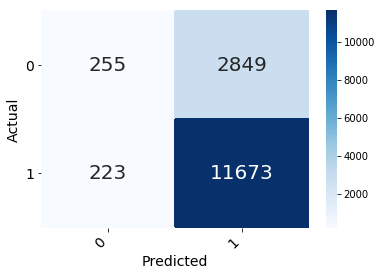

In [104]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.feature_selection import SelectFromModel, SelectKBest
from matplotlib import pyplot as plt
MainPipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(n_estimators=90) )])
#('fs',SelectFromModel(ExtraTreesClassifier())),
# split sample into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y,random_state=42)  # random_state=21 # stratify=y


# Fit Model
MainPipe.fit(X_train,y_train)

# Predict model
y_pred = MainPipe.predict(X_test)

# Output the accuracy of our prediction
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

# Visualize the confusion matrix to make it easier to read
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_df = pd.DataFrame(con_matrix, ('0', '1'), ('0', '1'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d", cmap="Blues")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)
plt.xlabel('Predicted', fontsize = 14)

# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

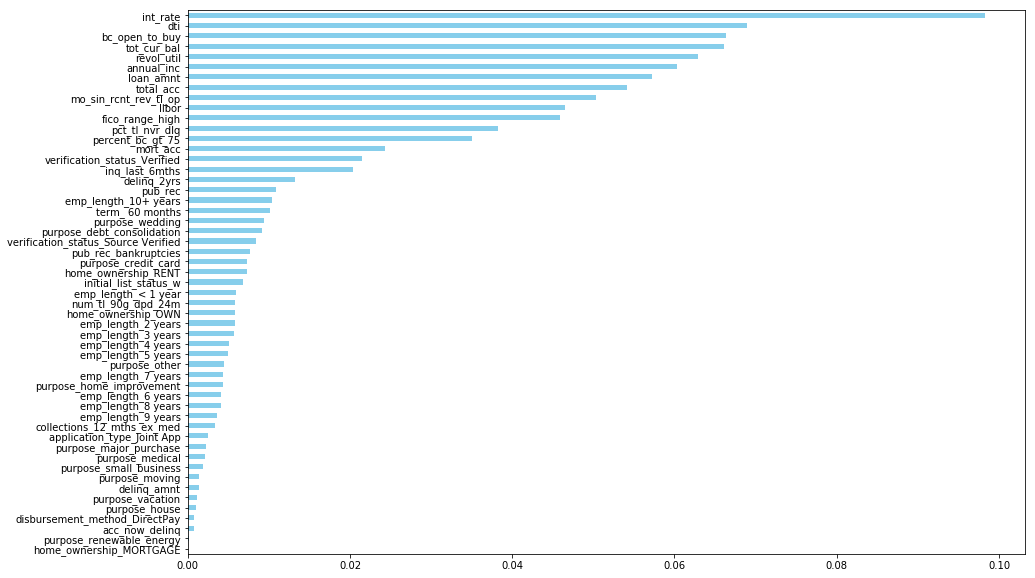

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a pd.Series of features importances
importances_rf = pd.Series(MainPipe.named_steps['classifier'].feature_importances_, index = pd.get_dummies(X,drop_first=True).drop(['home_ownership_NONE','purpose_educational'],axis=1).columns)

# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()

# Make a horizontal bar plot
plt.figure(figsize=(15,10))
sorted_importances_rf.plot(kind='barh', color='skyblue'); 
plt.show()

# Next Steps

- model currently is around 79% accurate
    - need to figure out if we want to drop more of these and if that will improve accuracy?
    - test on a bigger subset? (currently only testing on 50k)
    - use more estimators (currently only using 90)
- return model
    - using same dataset, build a model that predicts return 
    - in the article (https://www.liebertpub.com/doi/full/10.1089/big.2018.0092) it describes how to do that in the end
- combination model
    - also in the article
    - need to make a combined model that accounts for both chance of defaulting and maximizing return
- end goal for notebook
    - to compare each model against a "random investment strategy" to show that our combination model (hopefully) is the best of the 4
    - maybe by coparing AUC as well as running simulations? not sure how to do this
    - clean up redundant code, and add in chart formatting throughout so the notebook looks professtional when we submit it